In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
file_path = "/content/NYPD_Complaint_Data_Current__Year_To_Date_.csv"
df = pd.read_csv(file_path)

In [85]:
df.nunique()

CMPLNT_NUM                  96734
ADDR_PCT_CD                    77
BORO_NM                         5
CMPLNT_FR_DT                  931
CMPLNT_FR_TM                 1439
CMPLNT_TO_DT                  674
CMPLNT_TO_TM                 1439
CRM_ATPT_CPTD_CD                2
HADEVELOPT                     24
HOUSING_PSA                   313
JURISDICTION_CODE              17
JURIS_DESC                     17
KY_CD                          59
LAW_CAT_CD                      3
LOC_OF_OCCUR_DESC               5
OFNS_DESC                      56
PARKS_NM                      139
PATROL_BORO                     8
PD_CD                         296
PD_DESC                       287
PREM_TYP_DESC                  74
RPT_DT                         90
STATION_NAME                  309
SUSP_AGE_GROUP                 11
SUSP_RACE                       7
SUSP_SEX                        3
TRANSIT_DISTRICT               12
VIC_AGE_GROUP                  10
VIC_RACE                        7
VIC_SEX       

In [86]:
# Remove duplicate rows (if any) [No duplicate rows here].
df.drop_duplicates(inplace=True)

In [87]:
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,825041611,84,BROOKLYN,03/31/2021,15:08:00,03/31/2021,15:12:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,675,VIOLATION,NaN,ADMINISTRATIVE CODE,NaN,PATROL BORO BKLYN NORTH,874.0,"PEDDLING,UNLAWFUL",STREET,03/31/2021,NaN,25-44,BLACK,M,NaN,UNKNOWN,UNKNOWN,E,988041,191045,40.691059,-73.986331,"(40.69105856700002, -73.98633121699999)",POINT (-73.98633121699999 40.69105856700002)
1,206649900,7,NaN,03/27/2021,19:29:00,NaN,NaN,NaN,NaN,NaN,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,NaN,PETIT LARCENY,NaN,PATROL BORO MAN SOUTH,333.0,"LARCENY,PETIT FROM STORE-SHOPL",NaN,03/28/2021,NaN,NaN,NaN,NaN,NaN,25-44,WHITE HISPANIC,D,987818,200162,40.716083,-73.987131,"(40.71608268700004, -73.98713051799997)",POINT (-73.98713051799997 40.71608268700004)
2,294801329,75,NaN,03/27/2021,13:00:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,03/27/2021,NaN,25-44,BLACK,M,NaN,25-44,BLACK,M,1018889,182737,40.668188,-73.875137,"(40.66818803900002, -73.87513706799997)",POINT (-73.87513706799997 40.66818803900002)
3,270261096,14,MANHATTAN,03/26/2021,16:40:00,NaN,NaN,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,PATROL BORO MAN SOUTH,333.0,"LARCENY,PETIT FROM STORE-SHOPL",DEPARTMENT STORE,03/26/2021,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,D,987220,212676,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)",POINT (-73.98928217599996 40.75043076800005)
4,433883572,110,QUEENS,03/26/2021,13:09:00,03/26/2021,14:29:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,113,FELONY,INSIDE,FORGERY,NaN,PATROL BORO QUEENS NORTH,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",SMALL MERCHANT,03/26/2021,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,D,1021552,212402,40.749601,-73.865373,"(40.74960053300003, -73.86537333399998)",POINT (-73.86537333399998 40.74960053300003)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96729,878858444,78,BROOKLYN,01/03/2021,18:53:00,01/03/2021,19:33:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,NaN,PATROL BORO BKLYN SOUTH,101.0,ASSAULT 3,HOSPITAL,01/03/2021,NaN,<18,BLACK,F,NaN,45-64,WHITE HISPANIC,M,990105,182698,40.668147,-73.978896,"(40.668146816000046, -73.97889574699997)",POINT (-73.97889574699997 40.668146816000046)
96730,756514518,47,BRONX,01/02/2021,15:20:00,01/02/2021,15:25:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,NaN,PATROL BORO BRONX,101.0,ASSAULT 3,RESIDENCE - APT. HOUSE,01/02/2021,NaN,25-44,UNKNOWN,M,NaN,25-44,BLACK,F,1023077,264473,40.892514,-73.859568,"(40.89251396600008, -73.859568127)",POINT (-73.859568127 40.89251396600008)
96731,129592431,40,BRONX,01/05/2021,12:00:00,01/06/2021,13:00:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,PATROL BORO BRONX,313.0,"LARCENY,PETIT BY FALSE PROMISE",RESIDENCE - APT. HOUSE,01/06/2021,NaN,UNKNOWN,UNKNOWN,M,NaN,45-64,BLACK HISPANIC,M,1009585,237833,40.819444,-73.908468,"(40.81944420600007, -73.90846796099999)",POINT (-73.90846796099999 40.81944420600007)
96732,502735737,14,MANHATTAN,01/04/2021,14:00:00,01/04/2021,14:05:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,NaN,PATROL BORO MAN SOUTH,101.0,ASSAULT 3,STREET,01/04/2021,NaN,25-44,WHITE,M,NaN,45-64,BLACK,M,986650,212527,40.750022,-73.991339,"(40.75002197300005, -73.99133946299997)",POINT (-73.99133946299997 40.75002197300005)


In [88]:
# Safety check for no null values in `CMPLNT_NUM` since it is a primary identifier
df = df[df["CMPLNT_NUM"].notnull()]
assert not df["CMPLNT_NUM"].isnull().values.any()

In [89]:
# We do not need uncompleted crimes for analysis
df.dropna(axis=0, subset=["CRM_ATPT_CPTD_CD"], inplace=True)

In [90]:
# This is one of the target variables, so we don't need null values.
df = df[df["LAW_CAT_CD"].notnull()]

In [91]:
# Instances of null borough and precinct can be removed.
mask = ~(df["BORO_NM"].isnull() & df["ADDR_PCT_CD"].isnull())
df = df[mask]

In [92]:
print(f'HADEVELOPT has {(df["HADEVELOPT"].isna().sum() / len(df["HADEVELOPT"]) * 100)}% null values')
print(f'PARKS_NM has {(df["PARKS_NM"].isna().sum() / len(df["PARKS_NM"]) * 100)}% null values')

HADEVELOPT has 99.59144411576095% null values
PARKS_NM has 99.63591981961481% null values


In [93]:
# Getting rid of HADEVELOPT and PARKS_NM since it has more than 99% null values.
del df["HADEVELOPT"], df["PARKS_NM"]

In [95]:
df = df[df["JURIS_DESC"].notnull()]

In [97]:
# It would be important to know the location of crime.
latlon_mask = ~(df["Latitude"].isnull() & df["Longitude"].isnull() & df["Lat_Lon"].isnull())
df = df[latlon_mask]

In [102]:
print(f'HOUSING_PSA has {(df["HOUSING_PSA"].isna().sum() / len(df["HOUSING_PSA"]) * 100)}% null values')
del df["HOUSING_PSA"] # Removing this column since it has > 90% null values

HOUSING_PSA has 91.86198051343581% null values


In [104]:
# No need of coordinates in the New York State Plane Coordinate System for our analysis
del df["X_COORD_CD"], df["Y_COORD_CD"]

In [110]:
print(f'STATION_NAME has {(df["STATION_NAME"].isna().sum() / len(df["STATION_NAME"]) * 100)}% null values')
del df["STATION_NAME"]

STATION_NAME has 97.99445605179868% null values


In [113]:
print(f'TRANSIT_DISTRICT has {(df["TRANSIT_DISTRICT"].isna().sum() / len(df["TRANSIT_DISTRICT"]) * 100)}% null values')
del df["TRANSIT_DISTRICT"]

TRANSIT_DISTRICT has 97.99445605179868% null values


In [136]:
df.to_csv("Cleaned_NYPD_Complaint_Data_Current__Year_To_Date_.csv")

In [125]:
plt.style.use("seaborn")

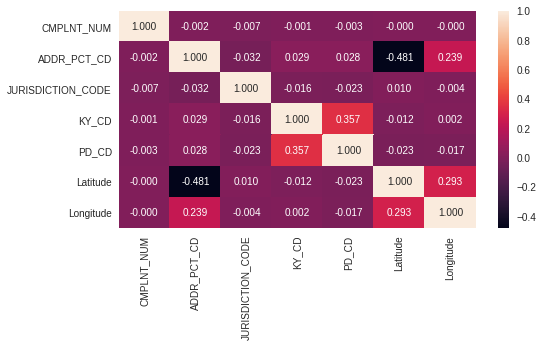

In [126]:
corr = df.corr()

fig, axes = plt.subplots(figsize=(8, 4))
sns.heatmap(corr, annot=True, fmt=".3f")

# There isn't significant correlation between the numerical columns except a few.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


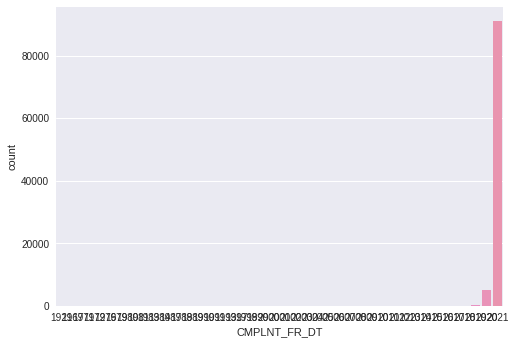

In [134]:
years = df["CMPLNT_FR_DT"].map(lambda dt: int(str(dt).split('/')[2]))

fig, ax = plt.subplots()
sns.countplot(years)

Most of the data points come from the year 2021 and 2020. 
So the classifier could overestimate the number of crimes since the number of crimes had increased in 2020 and 2021.

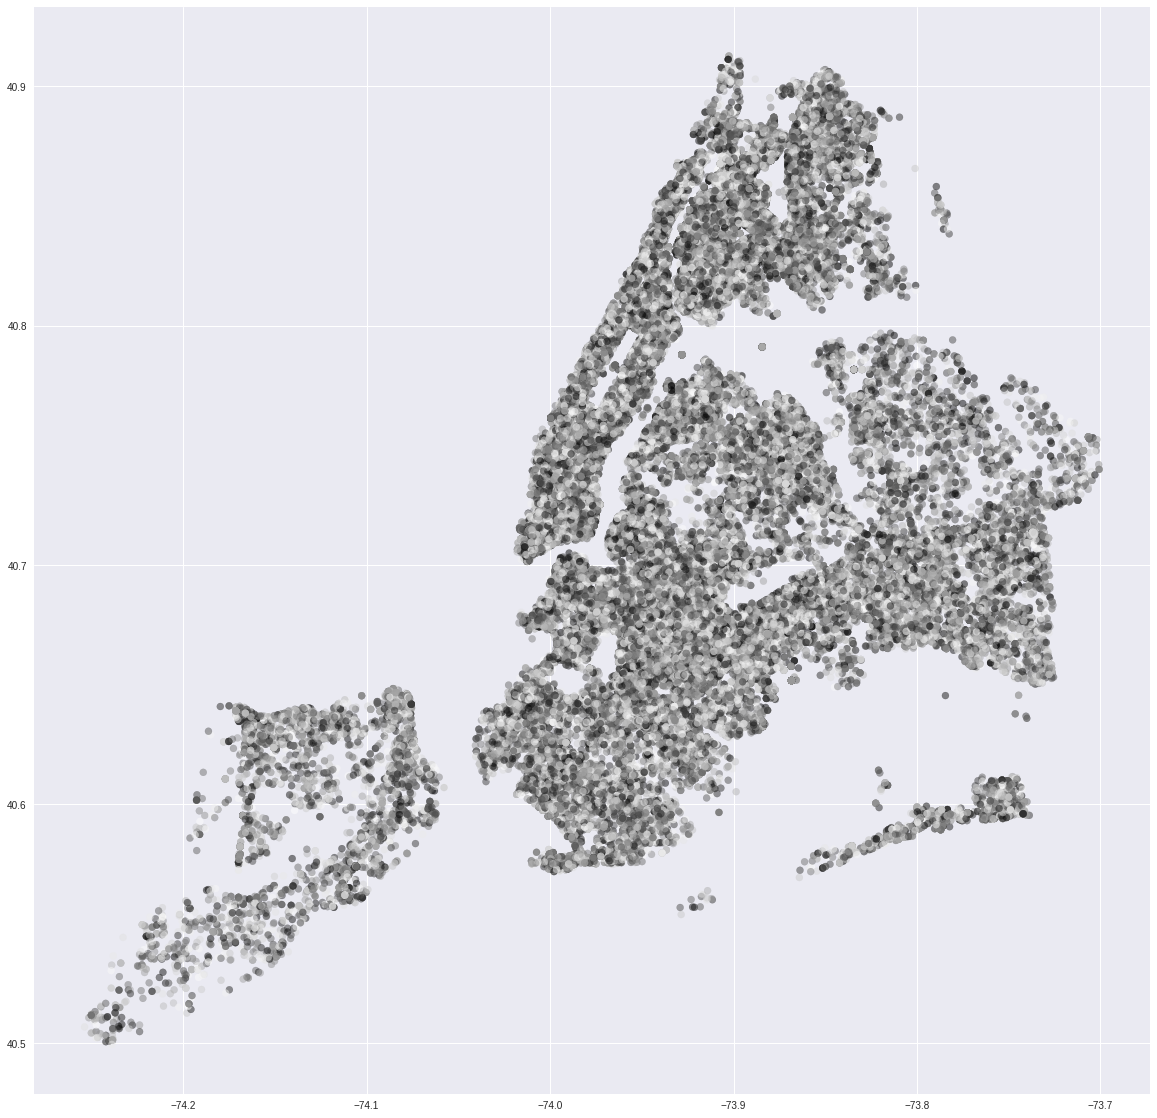

In [135]:
colors = np.random.rand(len(df['Longitude']))

plt.figure(figsize=(20,20))
plt.scatter(df['Longitude'], df['Latitude'],c=colors, alpha=0.5)
plt.show()